# ML Project

## Load Packages

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from sklearn.model_selection import train_test_split

## Load Dataset

In [3]:
# importing datasets
df = pd.read_csv('landing/persistent/thyroidDF.csv')
df.shape

(9172, 31)

## Variables

In [4]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

### Target

In [5]:
df.target.value_counts()

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

In [6]:
# Remove minoritary groups
target_groups = ["-", "A", "B", "C", "D", "E", "F", "G", "H"]
df = df.loc[df['target'].isin(target_groups)]
df.shape

(7546, 31)

In [7]:
# Rename the target categories with the correspondent diagnosis
df["target"].replace({"-": "negative",
                      "A": "hyperthyroid",
                      "B": "T3_toxic",
                      "C": "toxic_goitre",
                      "D": "secondary_toxic",
                      "E": "hypothyroid",
                      "F": "primary_hypothyroid",
                      "G": "compensated_hypothyroid",
                      "H": "secondary_hypothyroid"}, inplace=True)
df.target.value_counts()

negative                   6771
compensated_hypothyroid     359
primary_hypothyroid         233
hyperthyroid                147
T3_toxic                     21
secondary_toxic               8
toxic_goitre                  6
hypothyroid                   1
Name: target, dtype: int64

In [8]:
# Create a general target (negative, hyperthyroid, hypothyroid)
conditions = [(df['target'] == "negative"),
              (df['target'].isin(["hyperthyroid", "T3_toxic", "toxic_goitre", "secondary_toxic"])),
              (df['target'].isin(["hypothyroid", "primary_hypothyroid", "compensated_hypothyroid", "secondary_hypothyroid"]))]
values = ['negative', 'hyperthyroid', 'hypothyroid']

df['target_general'] = np.select(conditions, values)
df.target_general.value_counts()

negative        6771
hypothyroid      593
hyperthyroid     182
Name: target_general, dtype: int64

<AxesSubplot:xlabel='count', ylabel='target_general'>

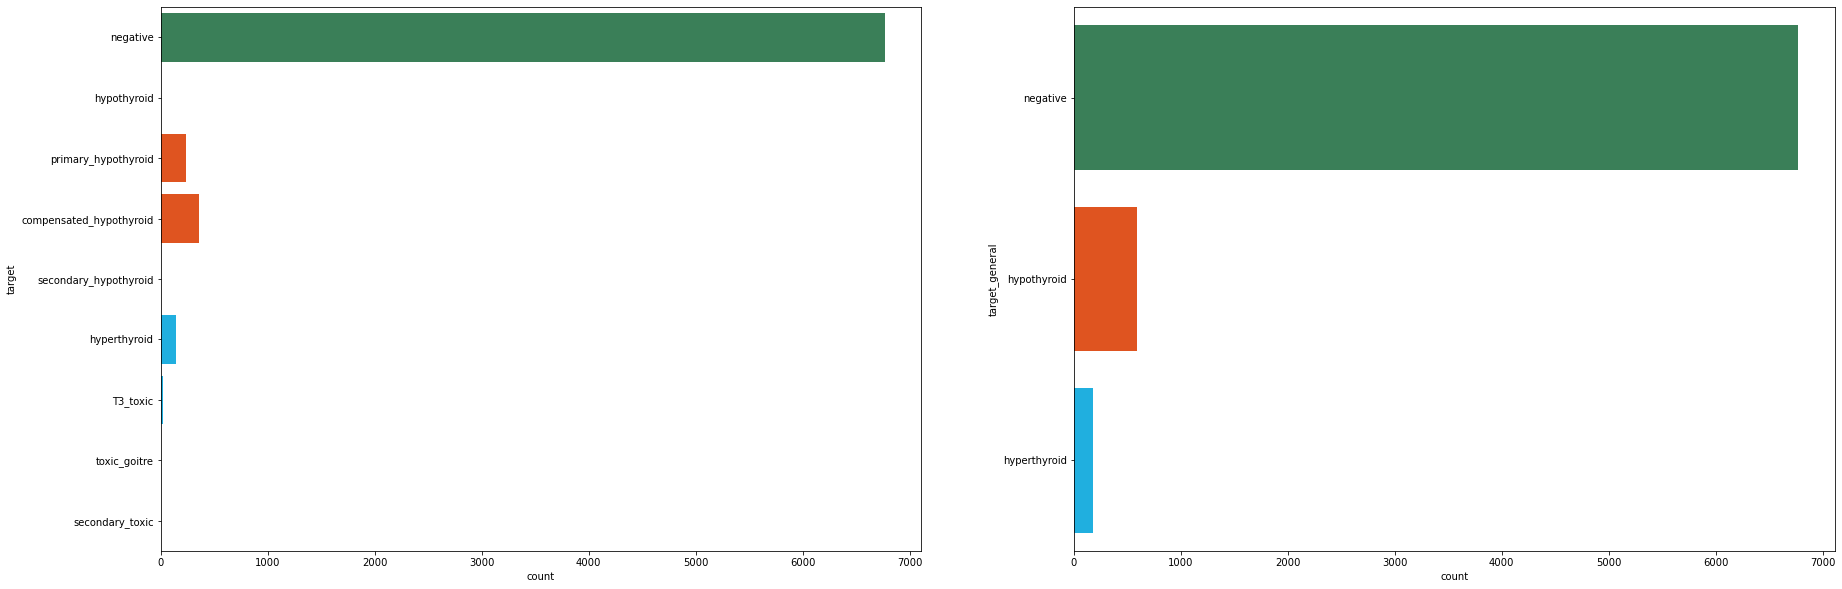

In [9]:
# Plot
target_order = ["negative", "hypothyroid", "primary_hypothyroid", "compensated_hypothyroid", "secondary_hypothyroid", "hyperthyroid", "T3_toxic", "toxic_goitre", "secondary_toxic"]
fig, axs = plt.subplots(ncols=2, figsize=(30, 10))
sns.countplot(y = 'target', data = df, ax=axs[0], order = target_order, palette = ["seagreen", "orangered", "orangered", "orangered", "orangered", "deepskyblue", "deepskyblue", "deepskyblue", "deepskyblue"])
sns.countplot(y = 'target_general', data = df, ax=axs[1], palette = ["seagreen", "orangered", "deepskyblue"])

### Age

In [10]:
df.age.describe()

count     7546.000000
mean        78.013782
std       1305.258137
min          1.000000
25%         37.000000
50%         55.000000
75%         67.000000
max      65526.000000
Name: age, dtype: float64

In [11]:
# Remove samples with abnormal age values
df = df.loc[(df['age'] > 0) & (df['age'] < 100)]
df.shape

(7542, 32)

<AxesSubplot:xlabel='age', ylabel='Count'>

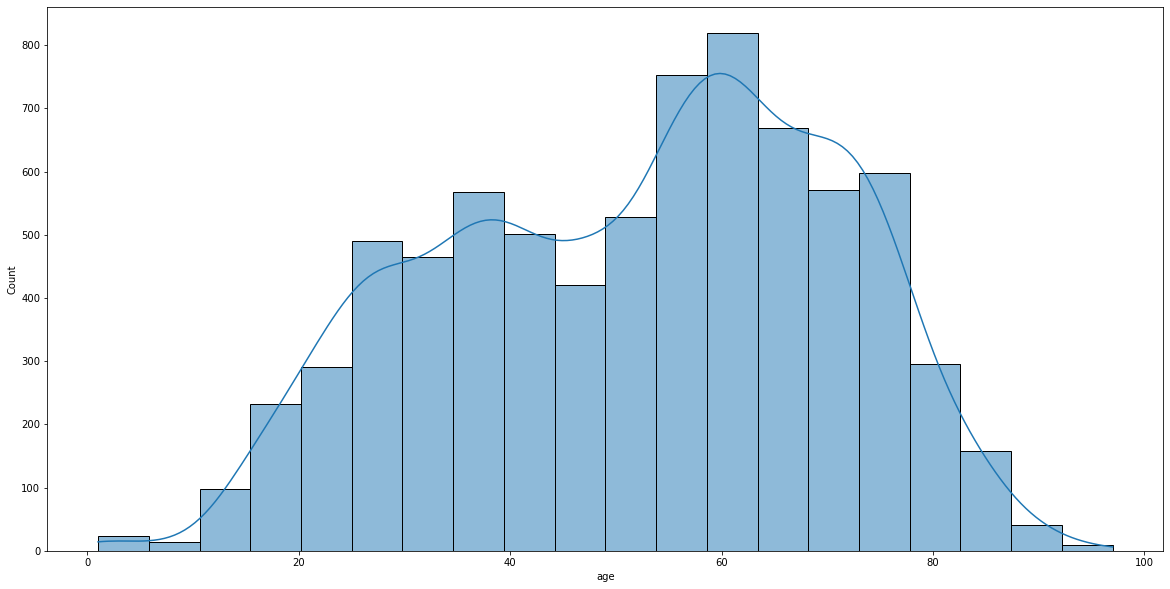

In [12]:
# Plot
#sns.boxplot(y = df.age)
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(x = df.age, kde = True, bins = 20, ax = ax)

### Sex

In [13]:
df.sex.value_counts()

F    4898
M    2394
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

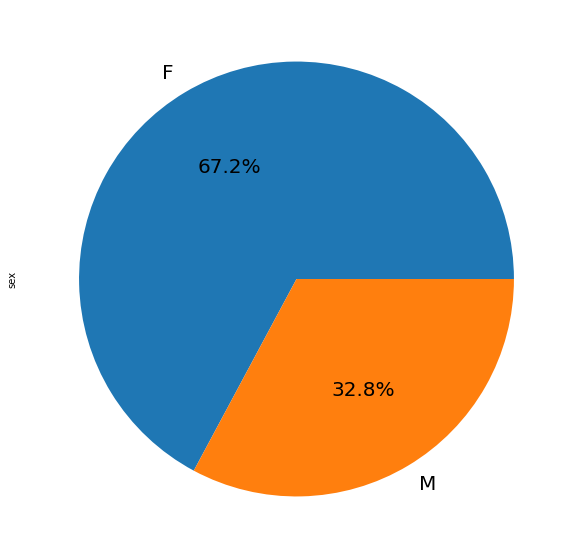

In [14]:
# Plot
sex_count = df.sex.value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
sex_count.plot(kind='pie', ax = ax, autopct='%1.1f%%', fontsize = 20)

### On thyroxine

In [15]:
df.on_thyroxine.value_counts()

f    6695
t     847
Name: on_thyroxine, dtype: int64

### Query on thyroxine

In [16]:
df.query_on_thyroxine.value_counts()

f    7419
t     123
Name: query_on_thyroxine, dtype: int64

### On antithyroid meds

In [17]:
df.on_antithyroid_meds.value_counts()

f    7450
t      92
Name: on_antithyroid_meds, dtype: int64

### Sick

In [18]:
df.sick.value_counts()

f    7262
t     280
Name: sick, dtype: int64

### Pregnant

In [19]:
df.pregnant.value_counts()

f    7509
t      33
Name: pregnant, dtype: int64

### Thyroid surgery

In [20]:
df.thyroid_surgery.value_counts()

f    7436
t     106
Name: thyroid_surgery, dtype: int64

### I131 treatment

In [21]:
df.I131_treatment.value_counts()

f    7402
t     140
Name: I131_treatment, dtype: int64

### Query hypothyroid

In [22]:
df.query_hypothyroid.value_counts()

f    7042
t     500
Name: query_hypothyroid, dtype: int64

### Query hyperthyroid

In [23]:
df.query_hyperthyroid.value_counts()

f    6987
t     555
Name: query_hyperthyroid, dtype: int64

### Lithium

In [24]:
df.lithium.value_counts()

f    7456
t      86
Name: lithium, dtype: int64

### Goitre

In [25]:
df.goitre.value_counts()

f    7468
t      74
Name: goitre, dtype: int64

### Tumor

In [26]:
df.tumor.value_counts()

f    7351
t     191
Name: tumor, dtype: int64

### Hypopituitary

In [27]:
df.hypopituitary.value_counts() 

f    7542
Name: hypopituitary, dtype: int64

In [28]:
# Remove hypopituitary variable since all are f
df = df.drop(columns = "hypopituitary")
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
       'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
       'TBG_measured', 'TBG', 'referral_source', 'target', 'patient_id',
       'target_general'],
      dtype='object')

### Psych

In [29]:
df.psych.value_counts()

f    7165
t     377
Name: psych, dtype: int64

### TSH_measured

In [30]:
df.TSH_measured.value_counts()

t    6820
f     722
Name: TSH_measured, dtype: int64

In [31]:
# Remove samples without the measure
df = df.loc[(df['TSH_measured'] == "t")]
df.shape

(6820, 31)

### TSH

In [32]:
df.TSH.describe()

count    6820.000000
mean        5.424492
std        26.087870
min         0.005000
25%         0.570000
50%         1.400000
75%         2.700000
max       530.000000
Name: TSH, dtype: float64

<AxesSubplot:xlabel='TSH', ylabel='Count'>

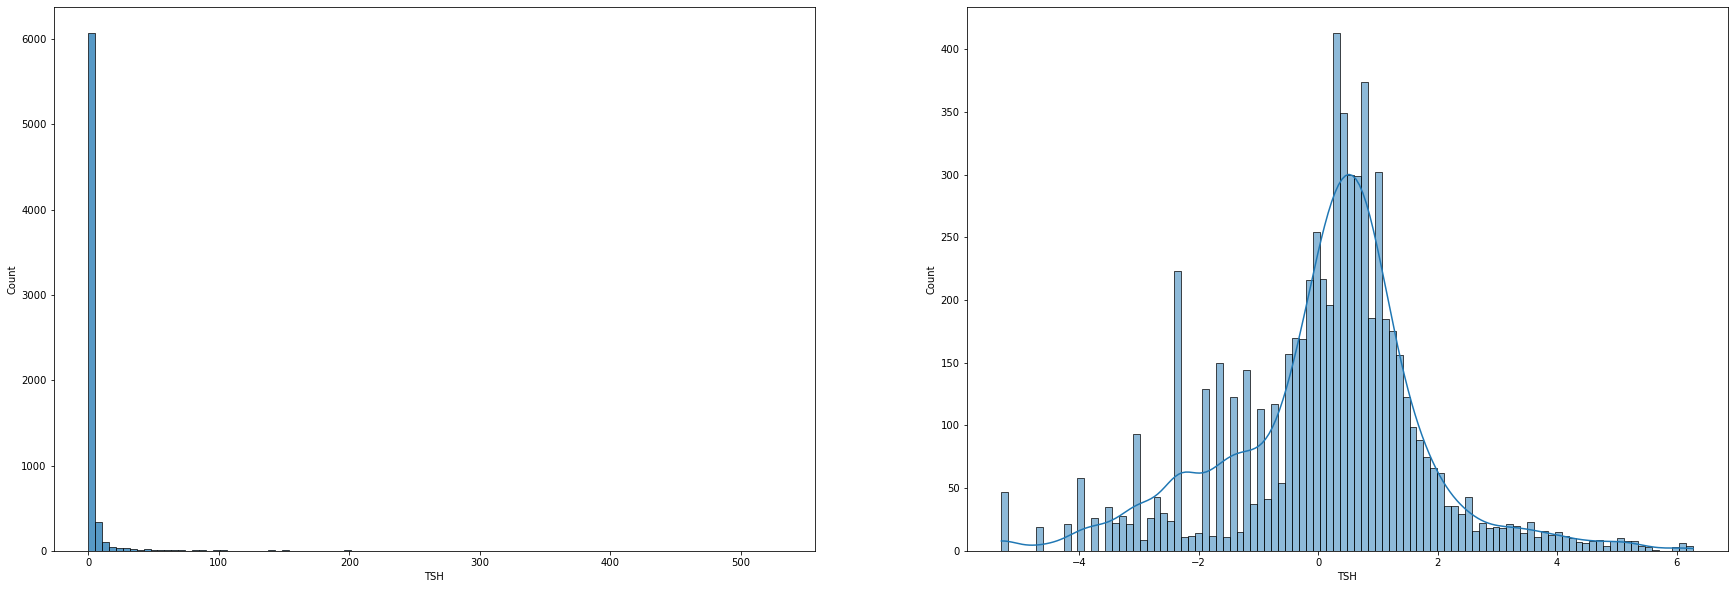

In [33]:
# Plot
fig, axs = plt.subplots(ncols = 2, figsize=(30, 10))
sns.histplot(x = df.TSH, bins = 100, ax = axs[0])
sns.histplot(x = np.log(df.TSH), kde = True, bins = 100, ax = axs[1])

### T3_measured

In [34]:
df.T3_measured.value_counts()

t    5132
f    1688
Name: T3_measured, dtype: int64

In [35]:
# Remove samples without the measure
df = df.loc[(df['T3_measured'] == "t")]
df.shape

(5132, 31)

### T3

In [36]:
df.T3.describe()

count    5132.000000
mean        2.010625
std         0.798000
min         0.050000
25%         1.600000
50%         1.900000
75%         2.300000
max        18.000000
Name: T3, dtype: float64

<AxesSubplot:xlabel='T3', ylabel='Count'>

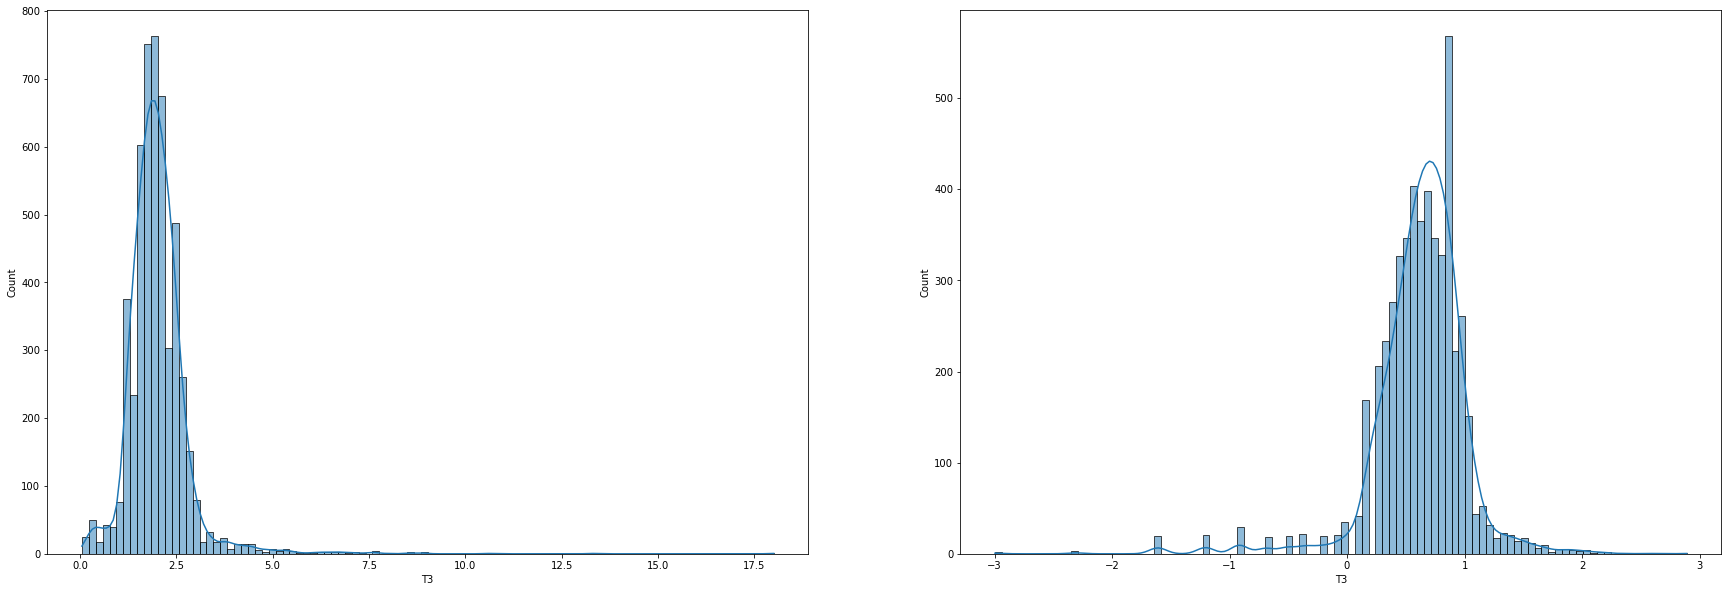

In [37]:
# Plot
fig, axs = plt.subplots(ncols = 2, figsize=(30, 10))
sns.histplot(x = df.T3, bins = 100, kde = True, ax = axs[0])
sns.histplot(x = np.log(df.T3), kde = True, bins = 100, ax = axs[1])

### TT4_measured

In [38]:
df.TT4_measured.value_counts()

t    5106
f      26
Name: TT4_measured, dtype: int64

In [39]:
# Remove samples without the measure
df = df.loc[(df['TT4_measured'] == "t")]
df.shape

(5106, 31)

### TT4

In [40]:
df.TT4.describe()

count    5106.000000
mean      105.020870
std        33.247004
min         2.000000
25%        88.000000
50%       103.000000
75%       120.000000
max       430.000000
Name: TT4, dtype: float64

<AxesSubplot:xlabel='TT4', ylabel='Count'>

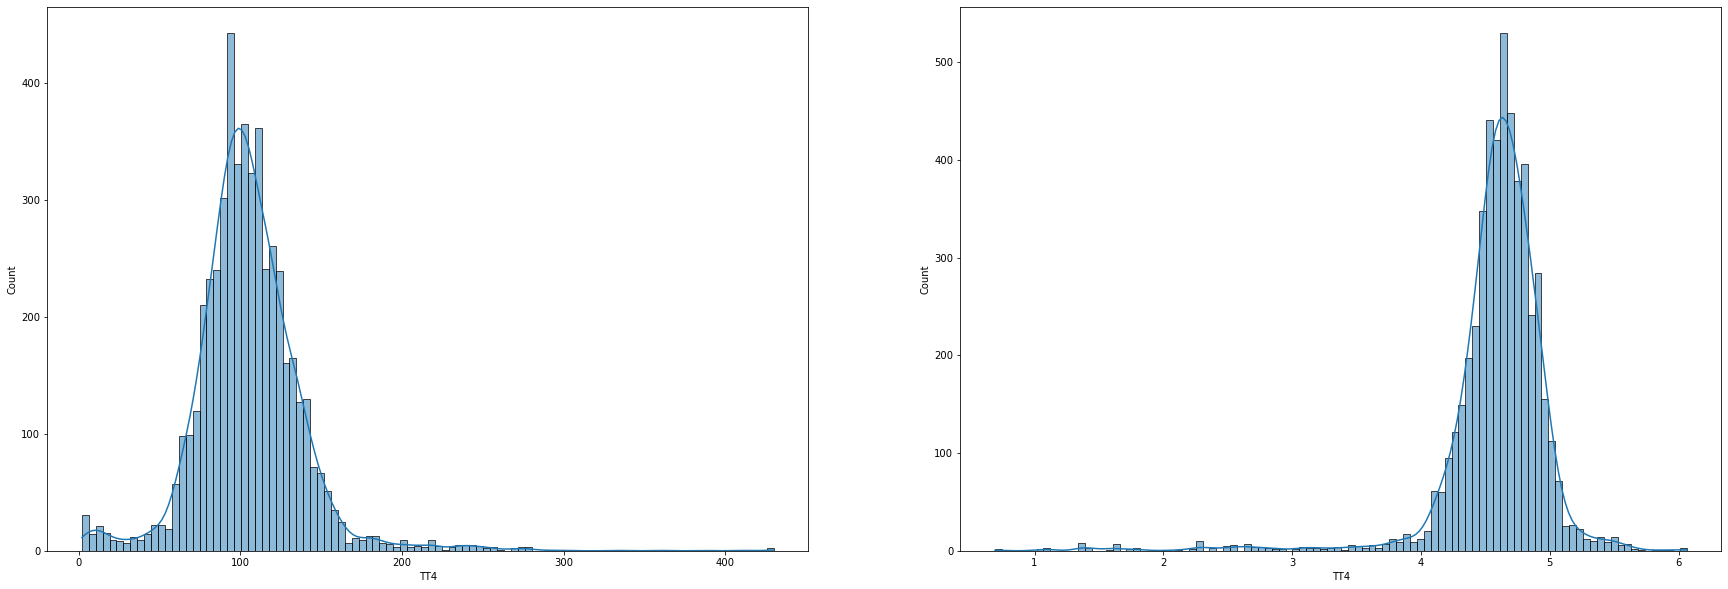

In [41]:
# Plot
fig, axs = plt.subplots(ncols = 2, figsize=(30, 10))
sns.histplot(x = df.TT4, bins = 100, kde = True, ax = axs[0])
sns.histplot(x = np.log(df.TT4), kde = True, bins = 100, ax = axs[1])

### T4U_measured

In [42]:
df.T4U_measured.value_counts()

t    4809
f     297
Name: T4U_measured, dtype: int64

In [43]:
# Remove samples without the measure
df = df.loc[(df['T4U_measured'] == "t")]
df.shape

(4809, 31)

### T4U

In [44]:
df.T4U.describe()

count    4809.000000
mean        0.975081
std         0.163036
min         0.250000
25%         0.870000
50%         0.970000
75%         1.060000
max         2.120000
Name: T4U, dtype: float64

<AxesSubplot:xlabel='T4U', ylabel='Count'>

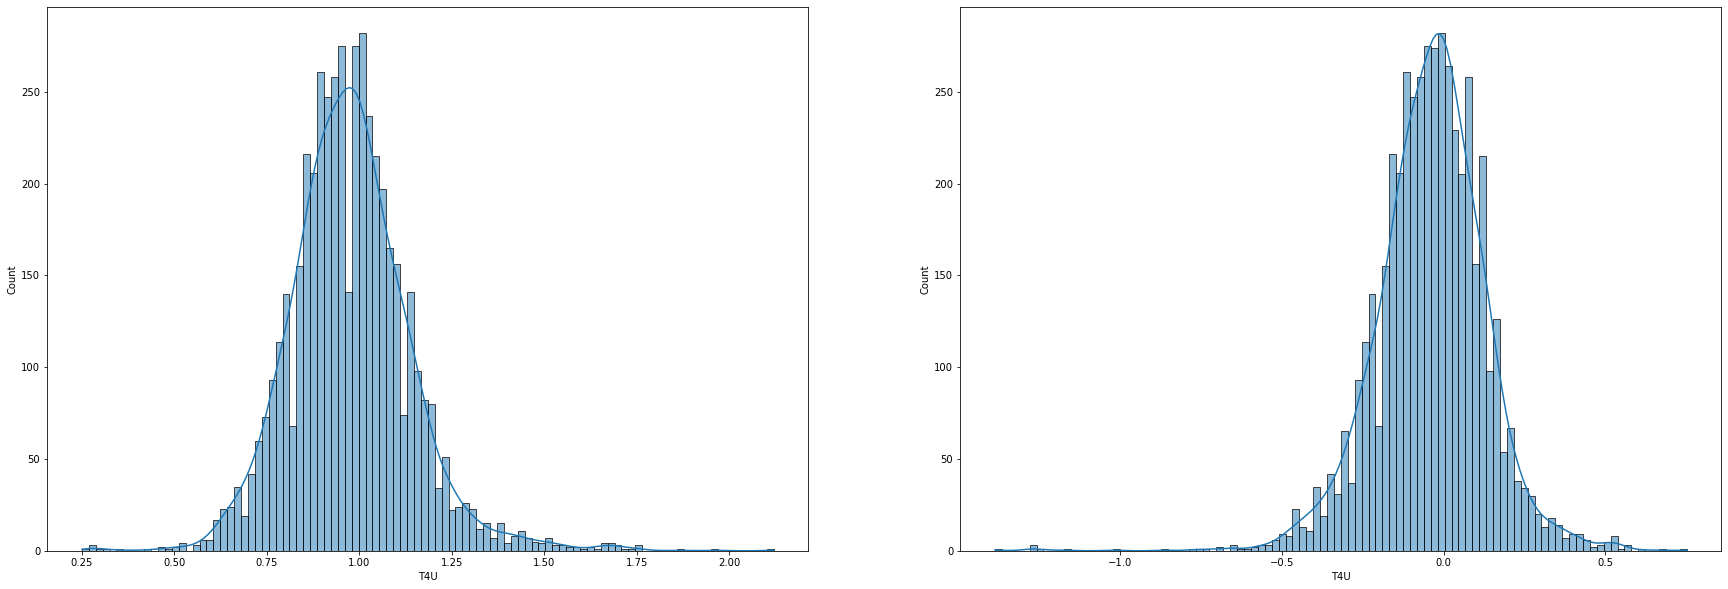

In [45]:
# Plot
fig, axs = plt.subplots(ncols = 2, figsize=(30, 10))
sns.histplot(x = df.T4U, bins = 100, kde = True, ax = axs[0])
sns.histplot(x = np.log(df.T4U), kde = True, bins = 100, ax = axs[1])

### FTI_measured

In [46]:
df.FTI_measured.value_counts()

t    4809
Name: FTI_measured, dtype: int64

In [47]:
# Remove samples without the measure
df = df.loc[(df['FTI_measured'] == "t")]
df.shape

(4809, 31)

### FTI

In [48]:
df.FTI.describe()

count    4809.000000
mean      109.688062
std        36.870829
min         1.400000
25%        93.000000
50%       107.000000
75%       124.000000
max       642.000000
Name: FTI, dtype: float64

<AxesSubplot:xlabel='FTI', ylabel='Count'>

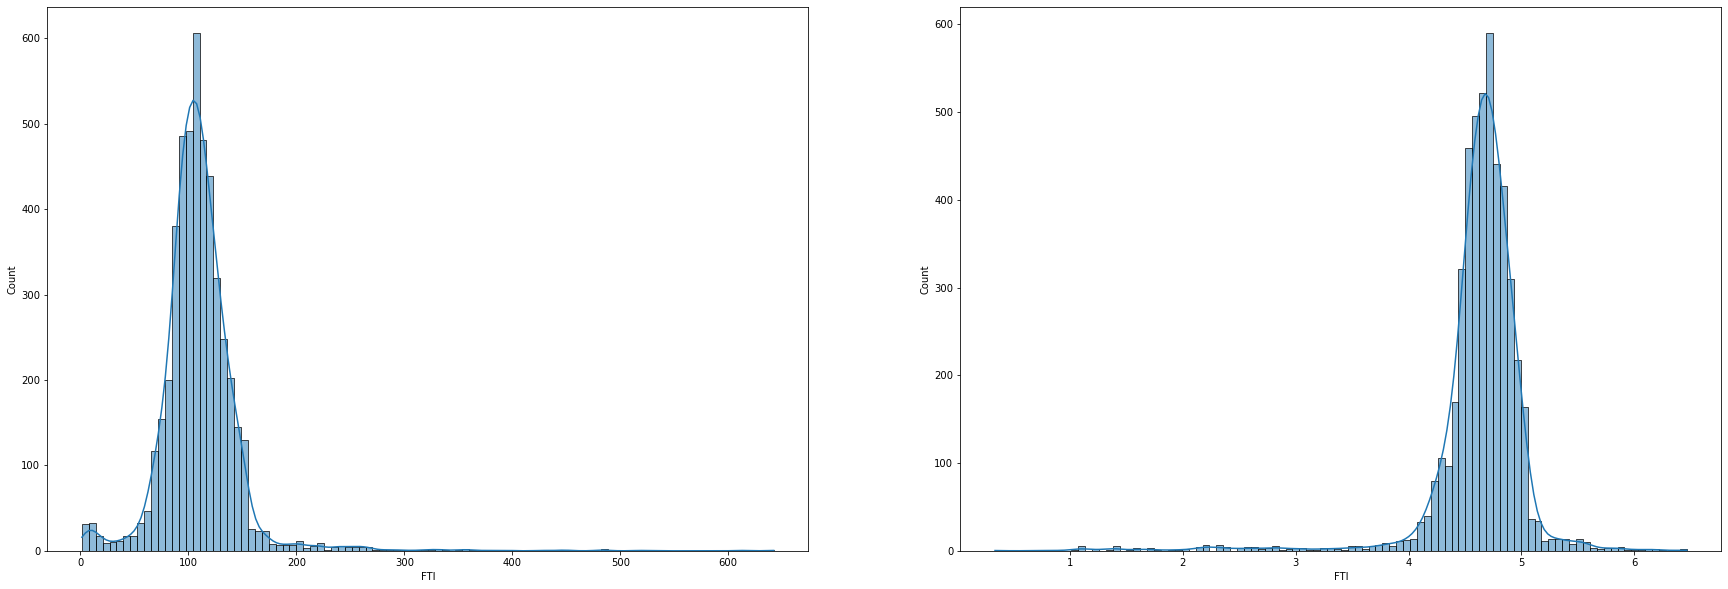

In [49]:
# Plot
fig, axs = plt.subplots(ncols = 2, figsize=(30, 10))
sns.histplot(x = df.FTI, bins = 100, kde = True, ax = axs[0])
sns.histplot(x = np.log(df.FTI), kde = True, bins = 100, ax = axs[1])

### TBG_measured

In [50]:
df.TBG_measured.value_counts()

f    4782
t      27
Name: TBG_measured, dtype: int64

In [51]:
# Remove this measure since there are few samples with a value
df = df.drop(columns = "TBG_measured")
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
       'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
       'TBG', 'referral_source', 'target', 'patient_id', 'target_general'],
      dtype='object')

### TBG

In [52]:
# Remove these values also
df = df.drop(columns = "TBG")
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
       'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
       'referral_source', 'target', 'patient_id', 'target_general'],
      dtype='object')

### referral_source

In [53]:
df.referral_source.value_counts()

other    2489
SVI      1453
SVHC      721
STMW       96
SVHD       50
Name: referral_source, dtype: int64

<AxesSubplot:xlabel='count', ylabel='referral_source'>

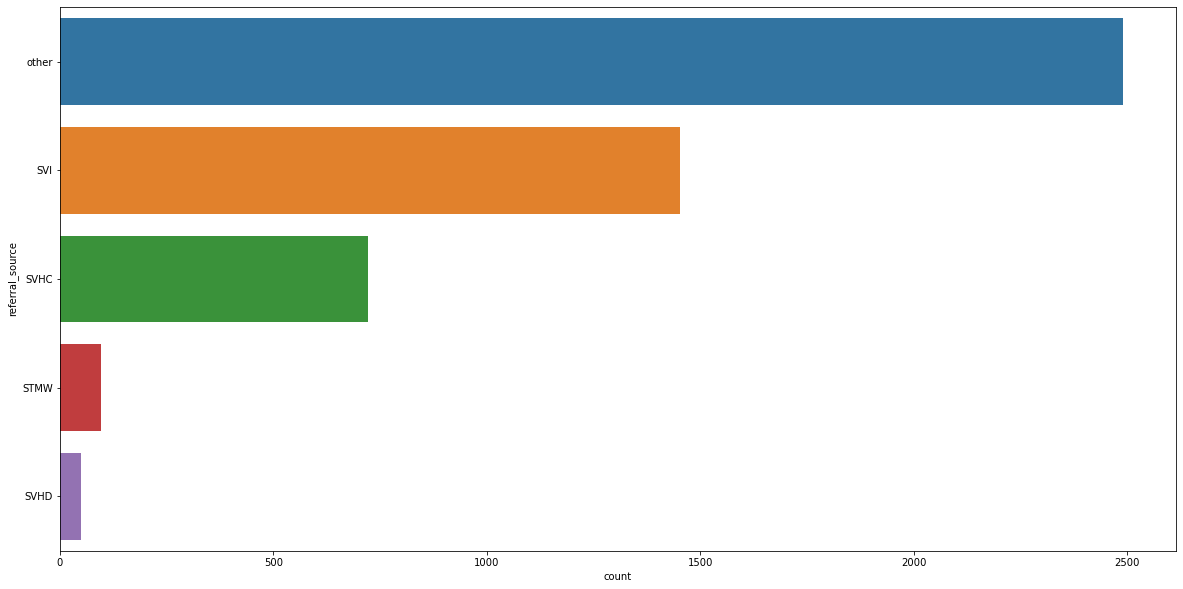

In [54]:
# Plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y = df.referral_source, data = df, ax=ax)

## Nan values

In [55]:
df.isna().sum()

age                      0
sex                    153
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
psych                    0
TSH_measured             0
TSH                      0
T3_measured              0
T3                       0
TT4_measured             0
TT4                      0
T4U_measured             0
T4U                      0
FTI_measured             0
FTI                      0
referral_source          0
target                   0
patient_id               0
target_general           0
dtype: int64

In [56]:
df[["TSH_measured", "T3_measured", "TT4_measured", "T4U_measured", "FTI_measured", "TBG_measured"]].value_counts()
# remove TBG variable since it is never measured
# only take samples with the rest of variables measured (n = 2029)??? -> idea: remove all columns *_measured and then remove those samples with some Nan in TSH, T3, TT4, T4U or FTI columns.
# ... or do some knn imputation as in lab1 for those that have at least 3 measures (for example)

KeyError: "['TBG_measured'] not in index"

## Outliers

In [ ]:
# After deciding which samples remove by Nan and doing imputation
# Plot some histograms and boxplots...
# Detect outliers with IQR criteria

## Feature Extraction

In [ ]:
# Create our final target variable with categories: negative, hyper, hypo (already done before)

## Normalization

In [ ]:
# Necessary??? (Assure gaussianity in numerical variables; if not, try some normalization explained in lab1 or apply log transformation)

## Save final dataset

In [ ]:
# export to csv
df.to_csv('Data/dataset.csv', index=False)